# **Hyperparameter Optimization Using Amazon SageMaker Automatic Model Tuning**

# Amazon SageMaker Automatic Model Tuning (AMT)

Amazon SageMaker Automatic Model Tuning (AMT) is a powerful tool that automates the process of hyperparameter optimization for machine learning models. This technique is specifically useful for algorithms like XGBoost, which require fine-tuning of hyperparameters to achieve optimal performance. In this guide, we’ll explore how AMT works, the role of hyperparameters, and why automatic tuning can significantly improve your model's performance.

## Key Concepts:

### Hyperparameters:

**Definition**: Hyperparameters are settings that control the training process of machine learning models. These are not learned from the data, unlike model parameters. Instead, they must be defined before training starts.

**Examples**:
- **Learning Rate**: The rate at which the model adjusts based on the error in predictions.
- **Number of Epochs**: The number of times the model will iterate over the entire dataset during training.
- **Max Depth**: The maximum depth of decision trees in algorithms like XGBoost.
- **Subsample Rate**: The fraction of data used for training in each boosting round.

### The Role of Hyperparameters in Model Performance:

Hyperparameters directly impact how well the model performs. Properly selecting and tuning hyperparameters ensures that the model:
- Learns effectively
- Avoids overfitting or underfitting
- Generalizes well to new data

### Why Manual Tuning is Difficult:

Manual tuning of hyperparameters involves trial and error and can be very inefficient. For complex models like XGBoost, the search space for hyperparameters can be vast, making it difficult to manually explore every combination. This process can also be computationally expensive.

---

## Automatic Model Tuning (AMT) with SageMaker:

Amazon SageMaker’s Automatic Model Tuning (AMT) simplifies this process by automating the search for optimal hyperparameters. With AMT, you define the search space, and SageMaker handles the experimentation and tuning, running multiple training jobs to evaluate different hyperparameter combinations. Here’s how the process works:

### 1. Define Hyperparameter Search Space:
You begin by defining the range or set of values for each hyperparameter. For example:
- **Learning Rate**: Range from 0.01 to 0.1
- **Max Depth**: Range from 3 to 10
- **Subsample Rate**: Range from 0.5 to 1.0

### 2. Launch SageMaker Tuning Jobs:
SageMaker automatically launches multiple training jobs, each with a different combination of hyperparameters from the search space. These jobs evaluate the model's performance with different settings.

### 3. Evaluation of the Results:
After the tuning jobs are completed, SageMaker evaluates which hyperparameter set produced the best model based on performance metrics (e.g., validation accuracy, loss).

### 4. Select the Best Model:
The combination of hyperparameters that resulted in the best performance is selected, and the corresponding model is ready for deployment or further use.

---

## Why Use Amazon SageMaker AMT for Tuning?

- **Efficiency**: AMT automates the hyperparameter search, significantly reducing the time and effort required for manual tuning.
- **Scalability**: SageMaker can run multiple experiments in parallel, allowing you to explore larger search spaces and find the best combination of hyperparameters more quickly.
- **Cost-Effectiveness**: By automating the optimization process, AMT helps you minimize computational resources and reduce costs compared to manual hyperparameter tuning.

---

## XGBoost and SageMaker:

XGBoost is a high-performance, scalable algorithm for supervised learning tasks, such as classification and regression. Amazon SageMaker provides a built-in version of XGBoost that can be used for large datasets. Using AMT with XGBoost helps to optimize key hyperparameters like learning rate, max depth, and subsample rate, ensuring the model performs optimally.

---

## Summary:

Amazon SageMaker Automatic Model Tuning (AMT) automates the process of tuning hyperparameters for machine learning models, making it easier to find the best hyperparameter values for optimal model performance. By leveraging AMT with XGBoost, you can efficiently train high-performing models while saving time, reducing computational costs, and improving accuracy.




```
# This is formatted as code
```

## **Overview**

This notebook is split into the following sections:
* Setup and Imports
* Load and Prepare dataset
* Train a SageMaker Built-In XGBoost Algorithm
* Train and Tune a SageMaker Built-In XGBoost Algorithm
* View the AMT job statistics
* Visualize AMT job results and tuned Hyperparameters


## Prerequisites

### ✅ Finding and Modifying IAM Role for SageMaker Domain

---

### Step 1: Log in to AWS Console

1. Go to the [AWS Console](https://aws.amazon.com/console/).
2. Enter your credentials (username and password) to log into the console.

---

### Step 2: Navigate to Amazon SageMaker

1. In the **AWS Management Console**, search for **SageMaker AI** in the search bar at the top.
2. Select **Amazon SageMaker AI** from the search results.
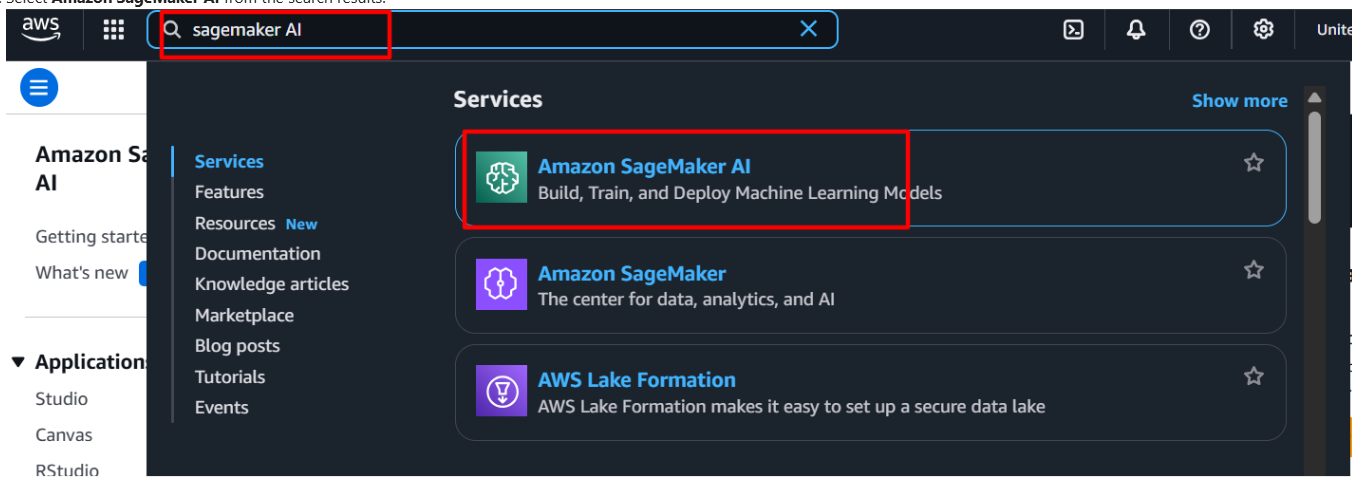

---

### Step 3: Go to SageMaker Studio Domain Section

1. In the **SageMaker Dashboard**, find the **SageMaker Studio** section on the left side.
2. Under **Amazon SageMaker Studio**, click on **Domains**.
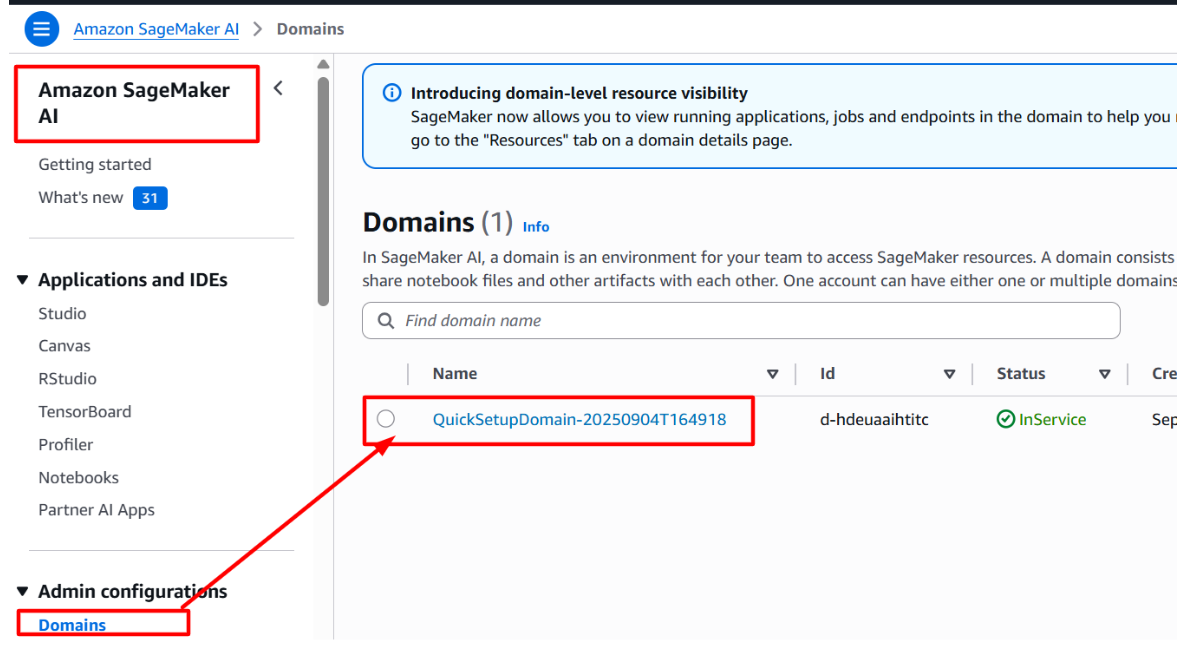

---

### Step 4: Identify the Domain and Execution Role

1. You will see a list of all the **SageMaker domains**. Look for the domain where you're facing issues (e.g., `QuickSetupDomain-20250904T164918`).
2. Click on the domain name to view the details.
3. In the **Authentication and permissions**, locate the **Space execution role**. This role will typically be named something like `arn:aws:iam::442042521384:role/service-role/AmazonSageMaker-ExecutionRole-20250904T164919`.
   - **Copy Suffix**:  
     `AmazonSageMaker-ExecutionRole-<unique_suffix>`
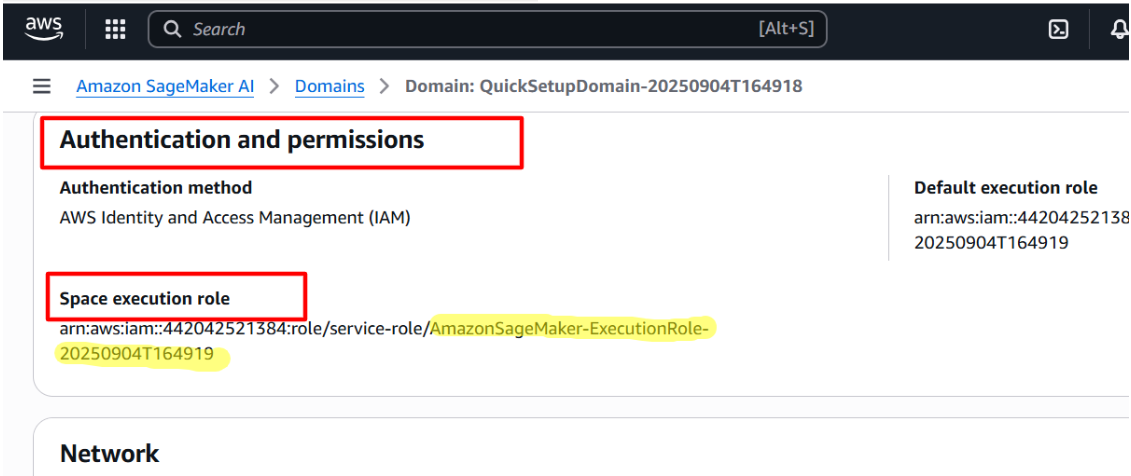

---

### Step 5: Go to IAM Console to Modify the Role

1. After identifying the **Execution Role**, go to the **IAM Console** in the AWS Management Console.
2. In the **IAM dashboard**, go to the **Roles** section on the left-hand side.
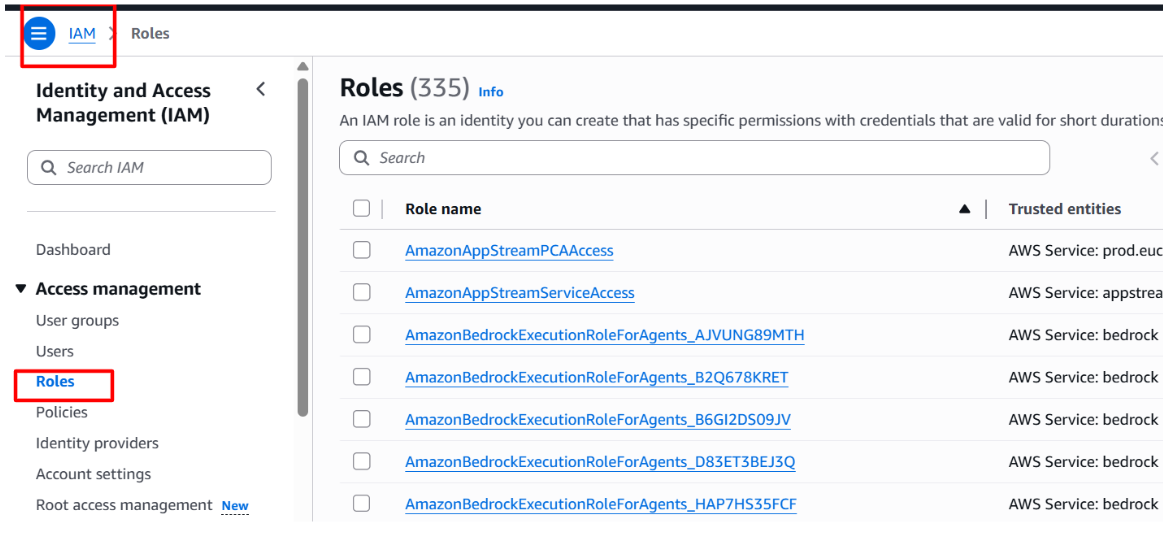
---

### Step 6: Search for the SageMaker Execution Role

1. In the **Filter roles** search box, paste the role name: **`AmazonSageMaker-ExecutionRole`**.
& Select it
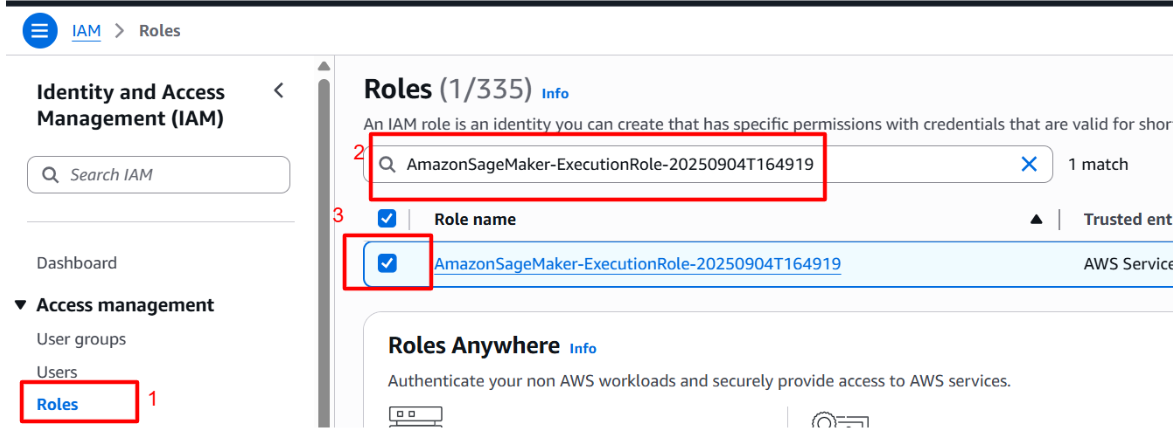

---

### Step 7: Select the Role

1. Click on the role that matches the **Execution Role ARN** identified in **Step 4**.
2. In **Permissions**, click on **Add permissions** and then **Click attach policies**.

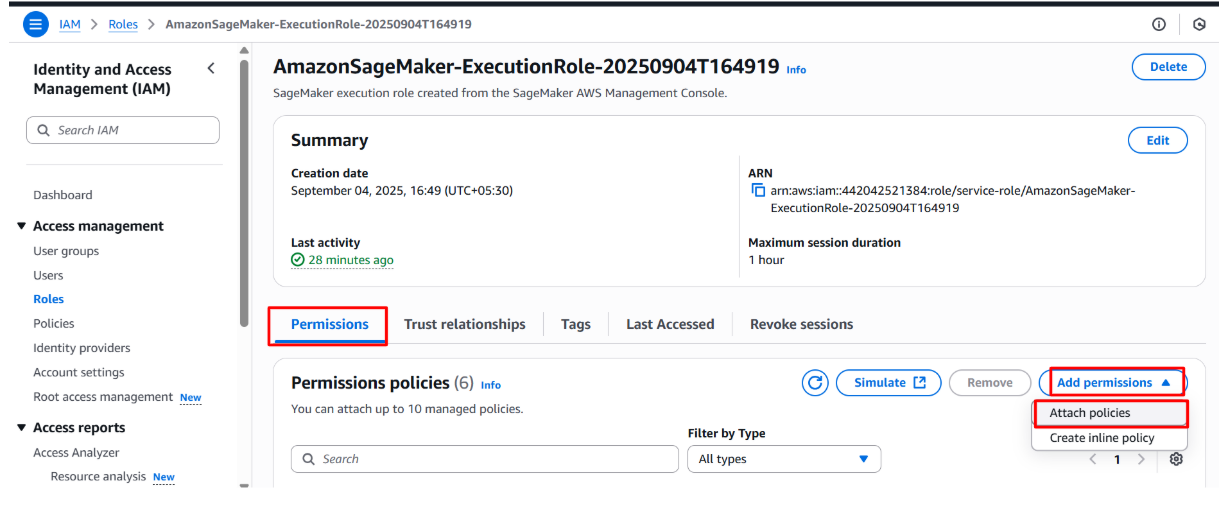

---

### Step 8: Attach Policy

1. In the **Attach policies** window, search for the following AWS managed policies:
   - **`AWSGlueConsoleFullAccess`** — Grants the necessary permissions for Glue access.
 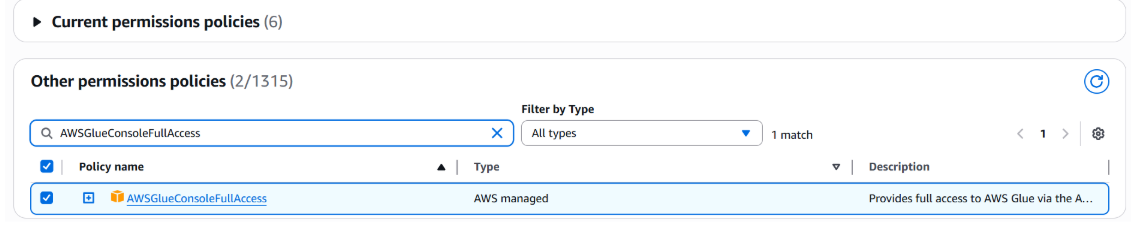

   - **`AmazonS3FullAccess`** — Grants full access to S3 resources.
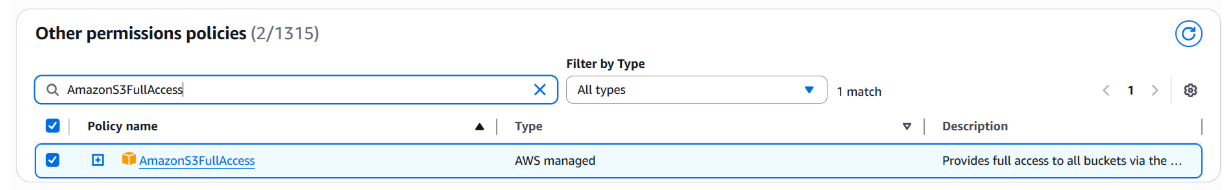

2. Now you have Selected both **`AWSGlueServiceRole`** and **`AmazonS3FullAccess`** policies.
3. Click on **Add Permissions** to attach the selected policies to the **SageMaker Execution Role**.

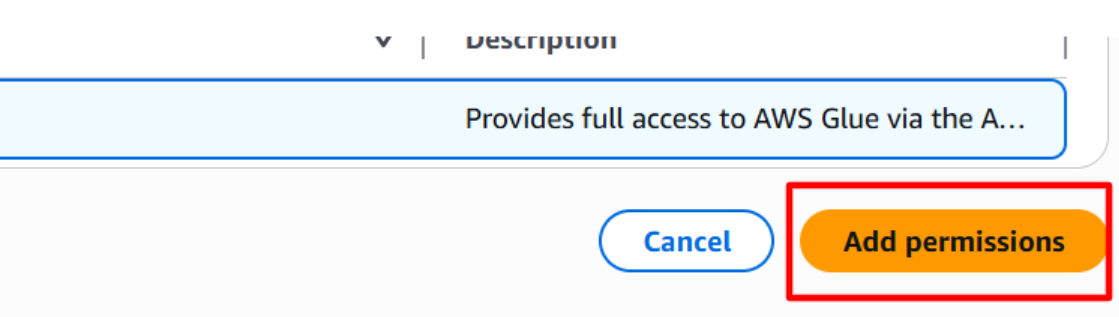
---

These policies will allow the **SageMaker Execution Role** to interact with **AWS Glue** and **Amazon S3**, which is required for your tasks.


## Notebook Setup

To make the development process smoother and to ensure that the latest versions of your modules are always used, we will enable some Jupyter magic commands.

### 1. `%load_ext autoreload`
This command loads the `autoreload` extension, which automatically reloads Python modules before executing any code in the notebook. This is useful during development, as it saves you the trouble of manually reloading modified modules every time you make changes.

### 2. `%autoreload 2`
This command sets the autoreload mode to **level 2**, which ensures that all modules are reloaded before each execution. With this setting, any changes made to the modules will be reflected automatically without needing to restart the kernel.

### 3. `%matplotlib inline`
This command is used to ensure that any plots generated using **matplotlib** will be displayed directly within the notebook, rather than in a separate window. It makes it easy to visualize graphs and charts inline with your code and outputs.

By including these commands at the top of your notebook, you will have a smoother workflow while working with SageMaker and other modules, and avoid the need to manually reload or refresh the notebook output.


In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

We ran this notebook using Amazon SageMaker with the version you see in the output of the next cell below. If your version is lower and you encounter issues, we recommend uncommenting the code below to upgrade your pip and SageMaker versions. Make sure to restart your kernel after upgrading for the changes to take effect.

In [2]:
import sagemaker

sagemaker.__version__

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


'2.245.0'

In [3]:
#!pip install --upgrade --quiet pip "sagemaker==2.121.0" # upgrade SageMaker to the recommended version

### Importing Required Libraries

In this section of the notebook, several Python libraries and modules are imported to facilitate various tasks, such as working with data, interacting with AWS services, and managing files. Here's a breakdown of the key imports:

1. **`import io`**:
   - This module provides the core tools for working with streams, such as reading and writing files in memory. It is commonly used when working with data that's being transferred between the local environment and AWS or when dealing with byte streams.

2. **`import os`**:
   - The `os` module is used to interact with the operating system, allowing you to manage file paths, directories, environment variables, and other system-level operations.

3. **`import argparse`**:
   - This module is used for parsing command-line arguments. It's useful when building scripts that need to take inputs or options from the command line (though it may not always be used directly in notebooks).

4. **`import traceback`**:
   - The `traceback` module allows you to extract, format, and display detailed error messages and stack traces. This is important for debugging and understanding the source of exceptions when things go wrong in the code.

5. **`import boto3`**:
   - `boto3` is the AWS SDK for Python, and it is crucial for interacting with AWS services such as Amazon S3, SageMaker, DynamoDB, and more. This library is used to manage AWS resources programmatically from within the notebook.

6. **`import numpy as np`**:
   - `numpy` is a powerful numerical computing library in Python. It provides tools for working with arrays and matrices, which are essential for data manipulation and machine learning tasks.

7. **`import pandas as pd`**:
   - `pandas` is a widely-used data manipulation library. It provides efficient data structures like `DataFrame` for handling structured data. It’s particularly useful for loading, processing, and analyzing data before feeding it into machine learning models.

8. **`from pathlib import Path`**:
   - `pathlib` is a modern library for working with filesystem paths in a more intuitive and object-oriented way. `Path` provides methods for handling file paths, checking file existence, and constructing paths with ease.

These libraries are essential for managing data, interacting with AWS services, and ensuring the smooth operation of machine learning workflows in SageMaker.


In [4]:
import io
import os
import argparse
import traceback
import boto3
import numpy as np
import pandas as pd

from pathlib import Path

In [5]:
# SDK setup

# Get the SageMaker execution role associated with the notebook instance
role = sagemaker.get_execution_role()

# Get the AWS region where the notebook is running
region = boto3.Session().region_name

# Create a SageMaker client using boto3 to interact with SageMaker services
sm = boto3.client('sagemaker')

# Create a new boto3 session with the specified region
boto_sess = boto3.Session(region_name=region)

# Create a SageMaker session object using the boto3 session and SageMaker client
sm_sess = sagemaker.session.Session(boto_session=boto_sess, sagemaker_client=sm)

In [6]:
# Data layout and locations.
# To store our data we are using a prefix in the Amazon SageMaker default bucket. Feel free to adjust to your preferences.

BUCKET = sm_sess.default_bucket()
PREFIX = 'amt-visualize-demo'

# Eventual output destination for our XGBoost model
output_path = f's3://{BUCKET}/{PREFIX}/output'
output_path

's3://sagemaker-us-east-1-005185643085/amt-visualize-demo/output'

## Load and Prepare dataset

In [7]:
# Create a new directory named 'data' if it doesn't already exist
!mkdir -p data

The focus of this notebook is on Hyperparameter Optimization. Hence the actual task and data only play a supporting role. But to give some brief context, we are optimizing the hyperparameters of an XGBoost model that should classify handwritten digits.



In [8]:
# Importing the datasets module from scikit-learn
from sklearn import datasets

# Loading the built-in 'digits' dataset, which contains images of handwritten digits
digits = datasets.load_digits()

# Converting the digits data (features) into a pandas DataFrame for easier manipulation
digits_df = pd.DataFrame(digits.data)

# Adding the target labels (the true digit values) as a new column 'y'
digits_df['y'] = digits.target

# Reordering the columns so that the target 'y' is the first column. XGBoost expects the target to be the first column.
digits_df.insert(0, 'y', digits_df.pop('y'))

digit: 4


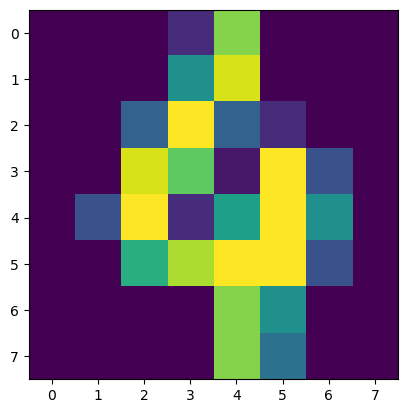

In [9]:
# Importing the pyplot module from matplotlib for visualization
from matplotlib import pyplot as plt

# Printing the target label (true digit) for the 100th image in the DataFrame
# We use iloc to select the 100th row and access the 'y' column
print('digit:', int(digits_df.iloc[100].y))

# Visualizing the image (digit) for the 100th row in the DataFrame
# iloc[100, 1:] selects the pixel values (excluding the target column)
# .values converts the selected row into a numpy array, and reshape(8, -1) reshapes the flattened image (64 pixels) into an 8x8 matrix
plt.imshow(digits_df.iloc[100, 1:].values.reshape(8, -1))
plt.show()  # Displaying the image

In [10]:
# randomly sort the data then split out into train 70% and validation 30% sets
train_data, valid_data= np.split(
    digits_df, [int(0.7 * len(digits_df))]
)

/opt/conda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
# Saving the training data to a CSV file called 'train.csv' in the 'data' directory
# `index=False` ensures that the row indices are not written to the CSV file
# `header=False` ensures that the column names (headers) are not written to the CSV file
train_data.to_csv('data/train.csv', index=False, header=False)

# Saving the validation data to a CSV file called 'valid.csv' in the 'data' directory
# `index=False` ensures that the row indices are not written to the CSV file
# `header=False` ensures that the column names (headers) are not written to the CSV file
valid_data.to_csv('data/valid.csv', index=False, header=False)


📌Update the bucket names with yours
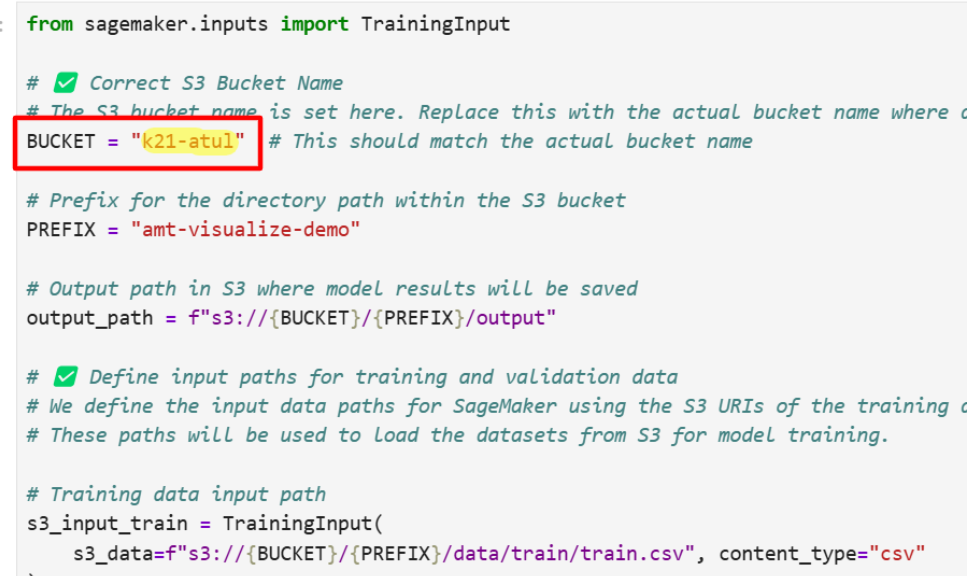

In [12]:
from sagemaker.inputs import TrainingInput  # Import TrainingInput

# ✅ Correct S3 Bucket Name
# The S3 bucket name is set here. Replace this with the actual bucket name where data and results will be stored.
BUCKET = "k22-atul"  # This should match the actual bucket name

# Prefix for the directory path within the S3 bucket
PREFIX = "amt-visualize-demo"

# Output path in S3 where model results will be saved
output_path = f"s3://{BUCKET}/{PREFIX}/output"

# ✅ Define input paths for training and validation data
# We define the input data paths for SageMaker using the S3 URIs of the training and validation data files.
# These paths will be used to load the datasets from S3 for model training.

# Training data input path
s3_input_train = TrainingInput(
    s3_data=f"s3://{BUCKET}/{PREFIX}/data/train/train.csv", content_type="csv"
)

# Validation data input path
s3_input_valid = TrainingInput(
    s3_data=f"s3://{BUCKET}/{PREFIX}/data/valid/valid.csv", content_type="csv"
)

# Printing the S3 bucket name and the paths for the training and validation data
# This is useful to verify that the paths are correctly set before training the model.
print(f"Using S3 Bucket: {BUCKET}")
print(f"Training Data Path: {s3_input_train.config['DataSource']['S3DataSource']['S3Uri']}")
print(f"Validation Data Path: {s3_input_valid.config['DataSource']['S3DataSource']['S3Uri']}")



Using S3 Bucket: k22-atul
Training Data Path: s3://k22-atul/amt-visualize-demo/data/train/train.csv
Validation Data Path: s3://k22-atul/amt-visualize-demo/data/valid/valid.csv


📌Update the bucket names with yours
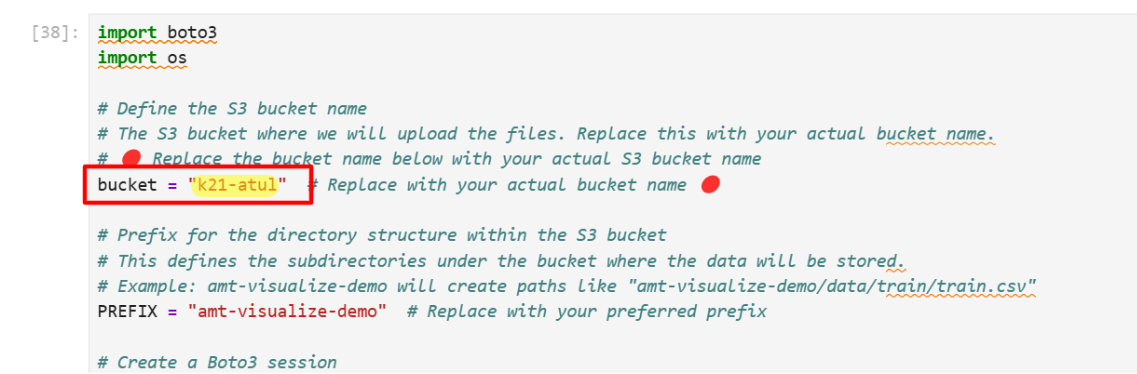

In [14]:
import boto3
import os

# Define the S3 bucket name
# The S3 bucket where we will upload the files. Replace this with your actual bucket name.
# 🔴 Replace the bucket name below with your actual S3 bucket name
bucket = "k22-atul"  # Replace with your actual bucket name 🔴

# Prefix for the directory structure within the S3 bucket
# This defines the subdirectories under the bucket where the data will be stored.
# Example: amt-visualize-demo will create paths like "amt-visualize-demo/data/train/train.csv"
PREFIX = "amt-visualize-demo"  # Replace with your preferred prefix

# Create a Boto3 session
# This creates a new session with AWS using the default credentials and configuration set on the environment.
boto_sess = boto3.Session()

# Upload train.csv to S3
# This uploads the 'train.csv' file from the local 'data/train.csv' path to the S3 bucket under the path 'amt-visualize-demo/data/train/train.csv'
# 🔴 Ensure the 'bucket' variable is correct before this line
boto_sess.resource('s3').Bucket(bucket).Object(os.path.join(PREFIX, 'data/train/train.csv')).upload_file('data/train.csv')

# Upload valid.csv to S3
# Similarly, this uploads the 'valid.csv' file from the local 'data/valid.csv' path to the S3 bucket under the path 'amt-visualize-demo/data/valid/valid.csv'
# 🔴 Ensure the 'bucket' variable is correct before this line
boto_sess.resource('s3').Bucket(bucket).Object(os.path.join(PREFIX, 'data/valid/valid.csv')).upload_file('data/valid.csv')

# Confirmation message to indicate that the files were successfully uploaded
print("Files successfully uploaded to S3!")


Files successfully uploaded to S3!


We upload our train and validation datasets into Amazon S3. Amazon SageMaker will launch training jobs on our behalf and those will read the data directly from S3.

## Train an Amazon SageMaker Built-In XGBoost Algorithm

SageMaker provides many Build in algorithms. For our example we use the popular XGBoost algorithm.

In below code you can see how we lookup the respective image and version of the algorithm. We then define the hyperparameters and instantiate an Estimator that describes our training. For a list of hyperparameters and their meaning for this algorithm  

Please recognize that for our small dataset we also specify the use of a small CPU based instance type for our training, specifically `ml.m5.large`.

Eventually we call `fit()` to start the training and to pass in references to where our training and validation data can be found.

__Side note__: Strictly speaking it would not be necessary to call the `fit()` method here for an individual training run. We will let SageMaker Automatic Model Tuning (AMT) instantiate and control the individual training runs later. We just need to pass in the Estimator we defined here as a template. We could comment out the call to `fit()`.

However, calling `fit()` shows us how one training run works and helps us to get acquainted with the algorithm and the log outputs, which are also available in Amazon CloudWatch. This works even though the actual execution is happening on a different EC2 machine. SageMaker makes the log outputs directly available in this notebook here. Neat, right?

📌Update the bucket names with yours
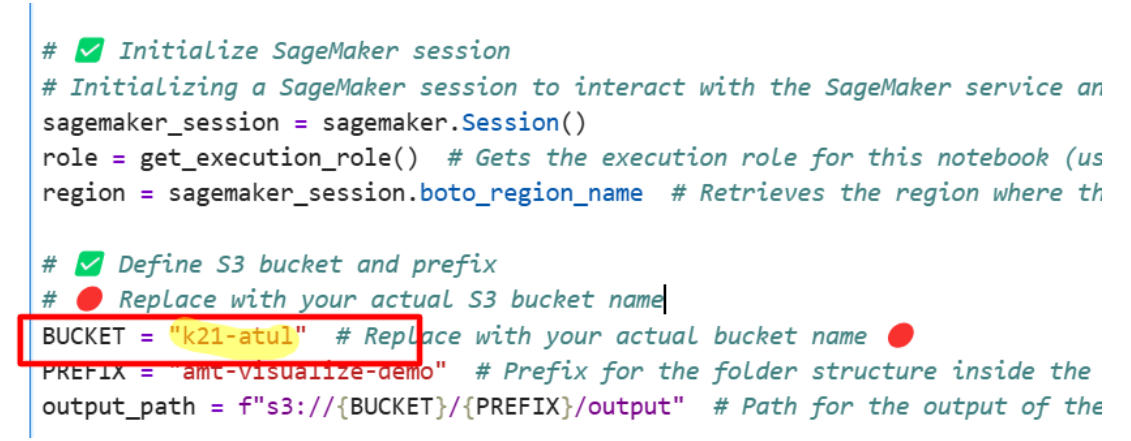

In [15]:
import sagemaker
import boto3
from sagemaker import get_execution_role, image_uris
from sagemaker.session import Session
from sagemaker.inputs import TrainingInput
from sagemaker.estimator import Estimator

# ✅ Initialize SageMaker session
# Initializing a SageMaker session to interact with the SageMaker service and access various SageMaker functionalities.
sagemaker_session = sagemaker.Session()
role = get_execution_role()  # Gets the execution role for this notebook (used for permissions)
region = sagemaker_session.boto_region_name  # Retrieves the region where the SageMaker resources will be used

# ✅ Define S3 bucket and prefix
# 🔴 Replace with your actual S3 bucket name
BUCKET = "k22-atul"  # Replace with your actual bucket name 🔴
PREFIX = "amt-visualize-demo"  # Prefix for the folder structure inside the S3 bucket
output_path = f"s3://{BUCKET}/{PREFIX}/output"  # Path for the output of the training job

# Print S3 paths
print(f"📂 Using S3 Bucket: {BUCKET}")
print(f"📂 Training Data Path: s3://{BUCKET}/{PREFIX}/data/train/train.csv")
print(f"📂 Validation Data Path: s3://{BUCKET}/{PREFIX}/data/valid/valid.csv")

# ✅ Lookup the XGBoost image URI
# Retrieves the Docker container image URI for the XGBoost algorithm in the specified region.
xgboost_container = image_uris.retrieve("xgboost", region, "1.5-1")
print("🚀 Algorithm container image:", xgboost_container)

# ✅ Ensure `num_round` and all hyperparameters are passed as strings
# Defining the hyperparameters for the XGBoost model as a dictionary. All values are passed as strings (required by SageMaker).
hyperparameters = {
    "num_class": "10",  # Number of classes for classification (digits dataset has 10 classes)
    "max_depth": "5",  # Maximum depth of the trees
    "eta": "0.2",  # Learning rate
    "alpha": "0.2",  # L2 regularization term
    "objective": "multi:softmax",  # Objective function for multi-class classification
    "eval_metric": "accuracy",  # Evaluation metric to track during training
    "num_round": "200",  # Number of boosting rounds (iterations)
    "early_stopping_rounds": "5"  # Stop if the validation metric doesn't improve after 5 rounds
}

# ✅ Print hyperparameters before training
# Display the hyperparameters that will be used for the training job.
print("✅ Final Hyperparameters:", hyperparameters)

# ✅ Define the SageMaker Estimator
# The Estimator is used to manage the training job in SageMaker. We define it with the XGBoost container, role, instance type, and other settings.
estimator = Estimator(
    image_uri=xgboost_container,  # The Docker image URI for the XGBoost algorithm
    role=role,  # The IAM role used for SageMaker operations
    instance_count=1,  # Number of training instances
    instance_type="ml.m5.large",  # Instance type for training (adjust based on requirements)
    volume_size=5,  # Size of the EBS volume for the instance in GB
    output_path=output_path,  # Output path in S3 where the model artifacts will be saved
    sagemaker_session=sagemaker_session,  # The SageMaker session for interacting with SageMaker resources
    hyperparameters=hyperparameters  # Hyperparameters passed to the estimator
)

# ✅ Define the training and validation dataset locations in S3
# Creating `TrainingInput` objects that specify the locations of the training and validation datasets in S3.
s3_input_train = TrainingInput(
    s3_data=f"s3://{BUCKET}/{PREFIX}/data/train/train.csv", content_type="csv"
)
s3_input_valid = TrainingInput(
    s3_data=f"s3://{BUCKET}/{PREFIX}/data/valid/valid.csv", content_type="csv"
)

# ✅ Verify if training files exist in S3 before training
# Using the S3 client from boto3 to check if the training and validation data exist in the specified S3 paths.
s3_client = boto3.client('s3')
response_train = s3_client.list_objects_v2(Bucket=BUCKET, Prefix=f"{PREFIX}/data/train/")
response_valid = s3_client.list_objects_v2(Bucket=BUCKET, Prefix=f"{PREFIX}/data/valid/")

# If the files are not found, raise an error and stop further execution
if 'Contents' not in response_train:
    raise FileNotFoundError(f"🚨 Training data not found at: s3://{BUCKET}/{PREFIX}/data/train/")
if 'Contents' not in response_valid:
    raise FileNotFoundError(f"🚨 Validation data not found at: s3://{BUCKET}/{PREFIX}/data/valid/")

# Confirmation that the datasets are available in S3 and training can proceed
print("✅ Training and validation datasets are available in S3. Proceeding with training...")

# ✅ Start the training job
# Calling the `fit()` method on the estimator to start the training job. This will trigger the model training process in SageMaker.
estimator.fit({"train": s3_input_train, "validation": s3_input_valid})

# Confirmation message to indicate that the training job has started
print("🚀 XGBoost Training Job Started! Check SageMaker Console for Progress.")



INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2026-01-20-08-08-04-236


📂 Using S3 Bucket: k22-atul
📂 Training Data Path: s3://k22-atul/amt-visualize-demo/data/train/train.csv
📂 Validation Data Path: s3://k22-atul/amt-visualize-demo/data/valid/valid.csv
🚀 Algorithm container image: 683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.5-1
✅ Final Hyperparameters: {'num_class': '10', 'max_depth': '5', 'eta': '0.2', 'alpha': '0.2', 'objective': 'multi:softmax', 'eval_metric': 'accuracy', 'num_round': '200', 'early_stopping_rounds': '5'}
✅ Training and validation datasets are available in S3. Proceeding with training...
2026-01-20 08:08:09 Starting - Starting the training job...
2026-01-20 08:08:24 Starting - Preparing the instances for training...
2026-01-20 08:08:46 Downloading - Downloading input data...
2026-01-20 08:09:32 Downloading - Downloading the training image......
2026-01-20 08:10:33 Training - Training image download completed. Training in progress../miniconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.In

## Train and Tune an Amazon SageMaker Built-In XGBoost Algorithm

Analogous to the Estimator above we now setup the HyperparameterTuner. We pass in the estimator object as a template for the trials to be run and a range of hyperparameters to define what search space to explore. Our documentation on tuning XGBoost gives you some tips on choosing parameter ranges and which objective to use.

You also see that we specify the number of training jobs to be run in total, as well as how many should run in parallel. Further you can select among many Strategies. In this notebook we use `Bayesian` as strategy. It uses a systematic approach to evaluate the search space. And it incorporates knowledge gained from earlier training runs (trials) when picking better hyperparameters to evaluate in the later trials, during the same __tuning__ job run.

*Bayesian Search as a strategy is an excellent default. In an upcoming notebook and article we will additionally contrast and compare different strategies.*

In [16]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

# Define the number of jobs
MAX_JOBS = 3  # Reduced from 50 to 3 for faster tuning
MAX_PARALLEL_JOBS = 1  # Run 1 at a time to save resources

# Define the hyperparameter search space
# These are the hyperparameters that will be tuned during the optimization process
# Hyperparameters are specified as ranges to be explored during the tuning job
tuner_parameters = {
    'alpha': ContinuousParameter(0.01, 0.5),  # Regularization term (L2) - Range between 0.01 and 0.5
    'eta': ContinuousParameter(0.1, 0.5),    # Learning rate - Range between 0.1 and 0.5
    'min_child_weight': ContinuousParameter(0.0, 2.0),  # Minimum sum of instance weight needed in a child - Range between 0.0 and 2.0
    'max_depth': IntegerParameter(1, 10)  # Maximum depth of the tree - Range between 1 and 10
}

# Configure the Hyperparameter Tuner
# This sets up the hyperparameter tuner with the Estimator, search space, objective, and tuning strategy
tuner = HyperparameterTuner(
    estimator=estimator,  # Use the existing SageMaker estimator defined earlier
    base_tuning_job_name="bayesian",  # Base name for the tuning job
    objective_metric_name="validation:accuracy",  # The metric to optimize during tuning
    objective_type="Maximize",  # We want to maximize the validation accuracy
    hyperparameter_ranges=tuner_parameters,  # The hyperparameter search space to explore
    strategy="Bayesian",  # Use Bayesian strategy to explore the search
    max_jobs=MAX_JOBS,  # Run only 3 tuning jobs to limit resource usage
    max_parallel_jobs=MAX_PARALLEL_JOBS,  # Run 1 job at a time for efficiency and resource conservation
)

# Start Hyperparameter Tuning
# This starts the hyperparameter tuning job, which will take the training and validation input data
print("Starting hyperparameter tuning job... This may take some time.")
tuner.fit({'train': s3_input_train, 'validation': s3_input_valid}, wait=False)

# Retrieve the name of the tuning job from the `tuner.describe()` method
# This will give us the unique job name assigned by SageMaker for tracking purposes
tuner_name = tuner.describe()['HyperParameterTuningJobName']

# Print a confirmation message with the name of the tuning job
# This provides feedback to the user that the tuning job has been submitted successfully
print(f'Tuning job submitted: {tuner_name}. Please note that this may take up to 30 minutes depending on the dataset size and resources.')


INFO:sagemaker:Creating hyperparameter tuning job with name: bayesian-260120-0811


Starting hyperparameter tuning job... This may take some time.
Tuning job submitted: bayesian-260120-0811. Please note that this may take up to 30 minutes depending on the dataset size and resources.


Analogous to the actual training with the estimator above, we also kick things off by calling `fit()`. This time on the HyperparameterTuner.

### Training Jobs Overview

Here is a snapshot of the training jobs from the SageMaker Console:
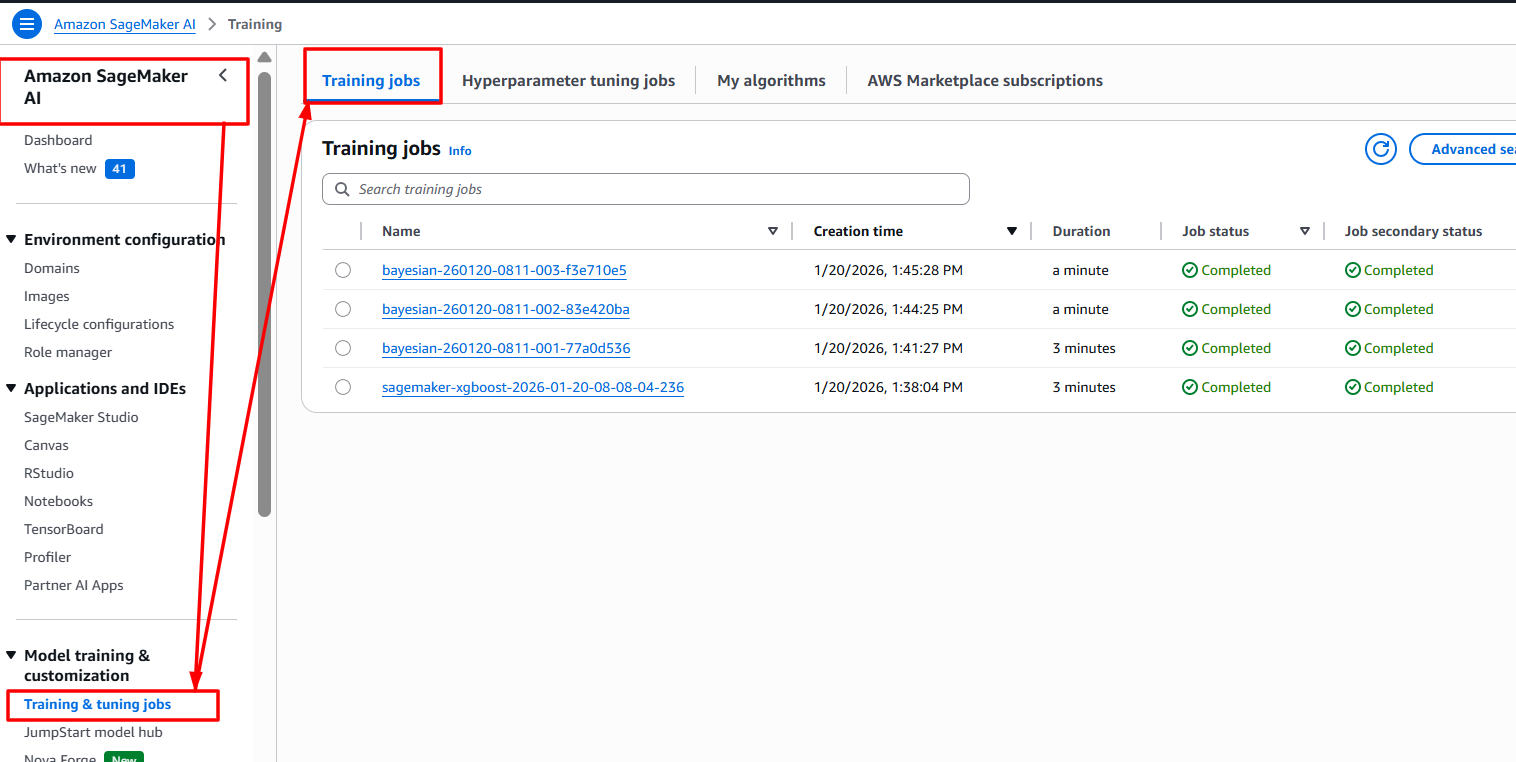
This shows the details of all training jobs, including their status, duration, and job completion information.


Amazon SageMaker AMT, here the HyperparameterTuner, now orchestrates different training jobs (trials) over a period of time.

We use `tuner.wait()` to pause this notebook's execution until the AMT job is completed and we can work with the results. Depending on the number of jobs and the level of parallelization this may take some time. For the example below it may take up to 30 minutes for 50 jobs. During this time you can view the status of your jobs in the console by navigating to Amazon SageMaker > Training > Hyperparameter tuning jobs.



In [17]:
# Wait for the hyperparameter tuning job to complete
tuner.wait()

...........................................................!


### Hyperparameter Tuning Job Overview

Here is a snapshot of the hyperparameter tuning jobs in the SageMaker Console:

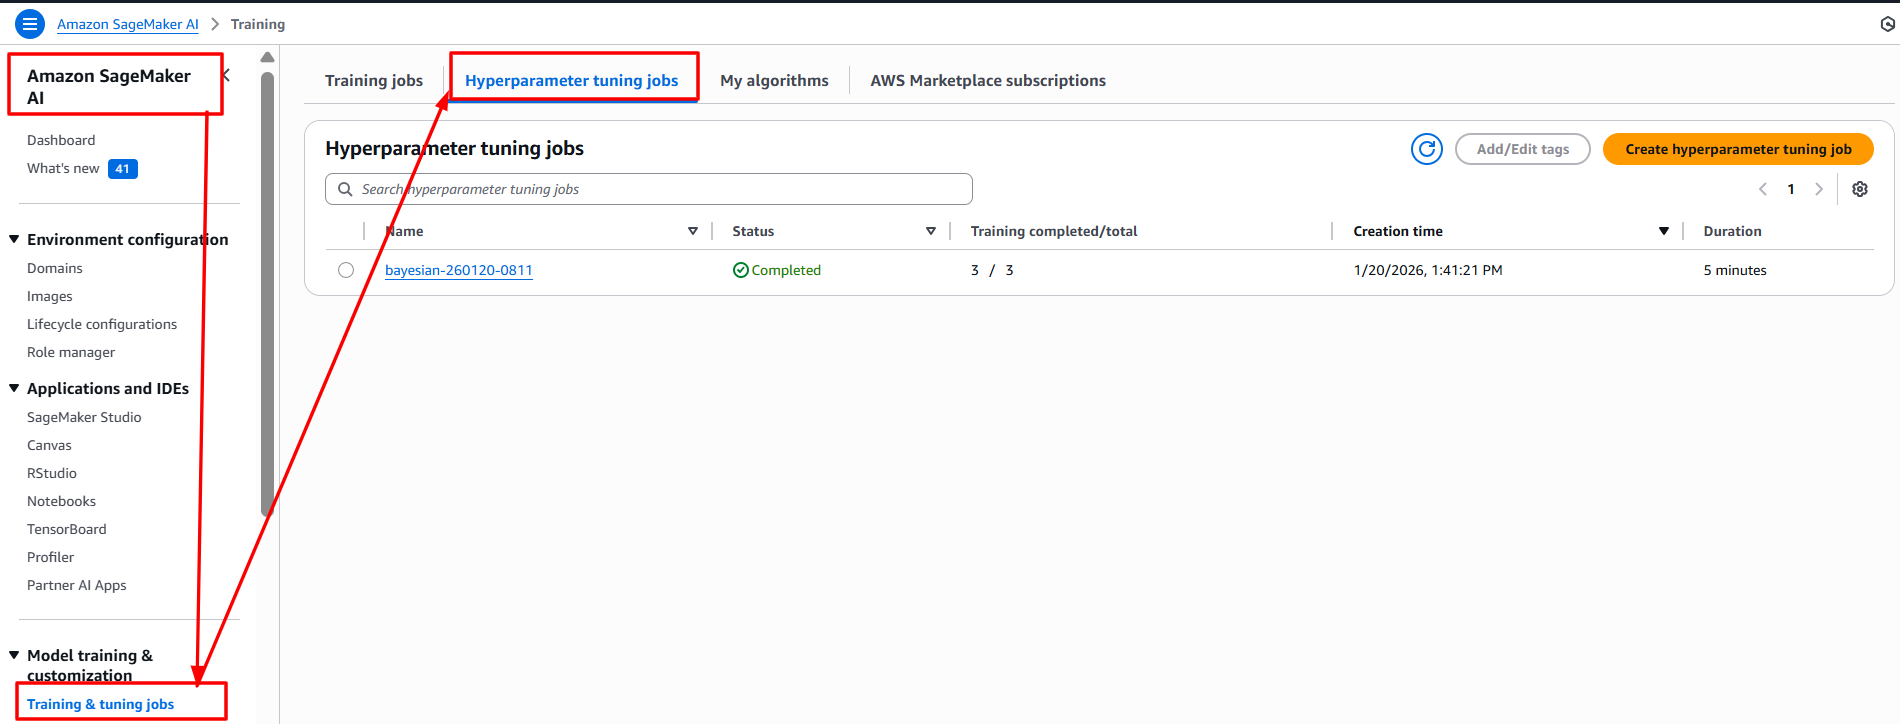
The tuning job is running, and we can track the status of the trials from the console.


## View the AMT job statistics and results

Your tuning jobs can be accessed from the Amazon SageMaker console at https://console.aws.amazon.com/sagemaker/. Select Hyperparameter tuning jobs from the Training menu to see the list.

You can also check the results of the jobs programmatically and investigate the hyperparameters used, the final value achieved in the objective function and the total training time per job.

Furthermore you can evaluate the results programmatically, which we will look into now.

#### 1. Via the Amazon SageMaker Python SDK

The SDK conveniently provides access to the tuning results as a Pandas dataframe.

In [18]:
# Retrieve the analytics of the hyperparameter tuning job and convert it to a pandas DataFrame
# This allows us to inspect the results of the tuning job

# Get the top 10 rows of the hyperparameter tuning job's analytics (e.g., evaluation metrics)
tuning_results = sagemaker.HyperparameterTuningJobAnalytics(tuner_name).dataframe()[:10]

# Display the top 10 rows of the tuning job results
print(tuning_results)


      alpha       eta  max_depth  min_child_weight  \
0  0.136745  0.233853        5.0          0.231816   
1  0.178255  0.240047        3.0          0.476055   
2  0.213890  0.151293        1.0          0.503226   

                     TrainingJobName TrainingJobStatus  FinalObjectiveValue  \
0  bayesian-260120-0811-003-f3e710e5         Completed              0.86667   
1  bayesian-260120-0811-002-83e420ba         Completed              0.88704   
2  bayesian-260120-0811-001-77a0d536         Completed              0.82222   

          TrainingStartTime           TrainingEndTime  \
0 2026-01-20 08:15:34+00:00 2026-01-20 08:16:18+00:00   
1 2026-01-20 08:14:30+00:00 2026-01-20 08:15:15+00:00   
2 2026-01-20 08:12:12+00:00 2026-01-20 08:14:17+00:00   

   TrainingElapsedTimeSeconds  
0                        44.0  
1                        45.0  
2                       125.0  


#### 2. Via the AWS SDK for Python (Boto3)

With the boto3 client we can review the results of a HPO job using [`describe_hyper_parameter_tuning_job()`]
It returns a Python dictionary with comprehensive information. Below you see the output scoped to the `BestTrainingJob`.

In [19]:
# To review all data of the tuning job, uncomment the line below:
# sm.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuner_name)

# Retrieve details of the best training job from the tuning job
best_training_job = sm.describe_hyper_parameter_tuning_job(HyperParameterTuningJobName=tuner_name)['BestTrainingJob']

# Print the details of the best training job
print(best_training_job)


{'TrainingJobName': 'bayesian-260120-0811-002-83e420ba', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:005185643085:training-job/bayesian-260120-0811-002-83e420ba', 'CreationTime': datetime.datetime(2026, 1, 20, 8, 14, 25, tzinfo=tzlocal()), 'TrainingStartTime': datetime.datetime(2026, 1, 20, 8, 14, 30, tzinfo=tzlocal()), 'TrainingEndTime': datetime.datetime(2026, 1, 20, 8, 15, 15, tzinfo=tzlocal()), 'TrainingJobStatus': 'Completed', 'TunedHyperParameters': {'alpha': '0.17825548628285454', 'eta': '0.24004671437328162', 'max_depth': '3', 'min_child_weight': '0.4760551423661572'}, 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:accuracy', 'Value': 0.8870400190353394}, 'ObjectiveStatus': 'Succeeded'}


We can also utilize Boto3's [`list_training_jobs_for_hyper_parameter_tuning_job()`] function to review the results. This can be sorted by the value of the objective function or by the metric definitions.

In [20]:
# List the training jobs for the given hyperparameter tuning job (`tuner_name`)
# The list is sorted by `FinalObjectiveMetricValue` in descending order to get the best-performing jobs first
hpo_jobs = sm.list_training_jobs_for_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuner_name,  # The name of the tuning job
    MaxResults=100,  # Limit the number of results to 100
    SortBy='FinalObjectiveMetricValue',  # Sort the results by the final objective metric
    SortOrder='Descending'  # Sort in descending order to get the best jobs first
)

# Loop through the top 10 training jobs in the list (based on objective metric)
for job in hpo_jobs['TrainingJobSummaries'][:10]:
    # Retrieve detailed information about the training job using its name
    job_descr = sm.describe_training_job(TrainingJobName=job['TrainingJobName'])

    # Extract the metrics from the job's final metric data list
    metrics = {m['MetricName']: m['Value'] for m in job_descr['FinalMetricDataList']}

    # Print the training job name and its corresponding metrics
    print(f'{job["TrainingJobName"]} Metrics: {metrics}')


bayesian-260120-0811-002-83e420ba Metrics: {'validation:mlogloss': 0.3379499912261963, 'ObjectiveMetric': 0.8870400190353394, 'train:mlogloss': 0.014829999767243862, 'validation:accuracy': 0.8870400190353394, 'train:accuracy': 1.0}
bayesian-260120-0811-003-f3e710e5 Metrics: {'validation:mlogloss': 0.437610000371933, 'ObjectiveMetric': 0.8666700124740601, 'train:mlogloss': 0.009580000303685665, 'validation:accuracy': 0.8666700124740601, 'train:accuracy': 1.0}
bayesian-260120-0811-001-77a0d536 Metrics: {'validation:mlogloss': 0.737339973449707, 'ObjectiveMetric': 0.8222200274467468, 'train:mlogloss': 0.4782800078392029, 'validation:accuracy': 0.8222200274467468, 'train:accuracy': 0.9331700205802917}


## Visualize AMT job results and tuned Hyperparameters

Finally, we want to interactively visualize the impact of our hyperparameters and their values on the optimization objective.

To do this, we utilize the Altair statistical visualization library for Python, and have written two custom analysis scripts `job_analytics.py` and `reporting_util.py` that we make available with this notebook.

In an upcoming notebook and article we will dive deeper into the analysis of this data.

In [24]:
# Use pip to install or upgrade Python packages
# The exclamation mark "!" is used to run shell commands from within a Jupyter notebook

# Install or upgrade pip (Python package installer) and altair (data visualization library)
!pip install -Uq pip altair

Please ensure that the role used by SageMaker allows the `cloudwatch:ListMetrics` action on [IAM]

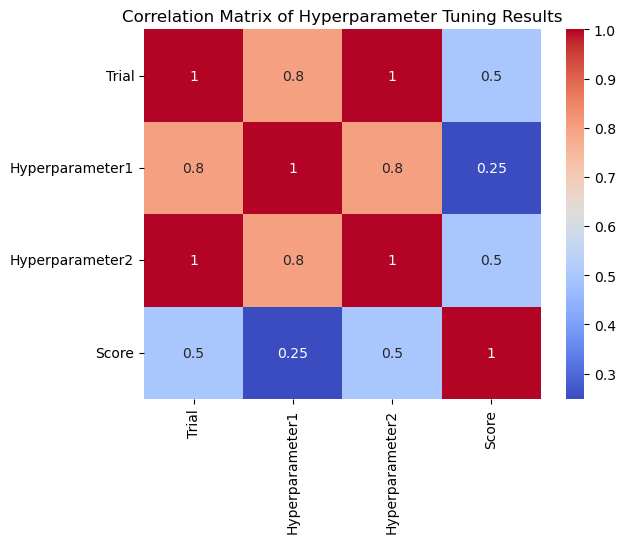

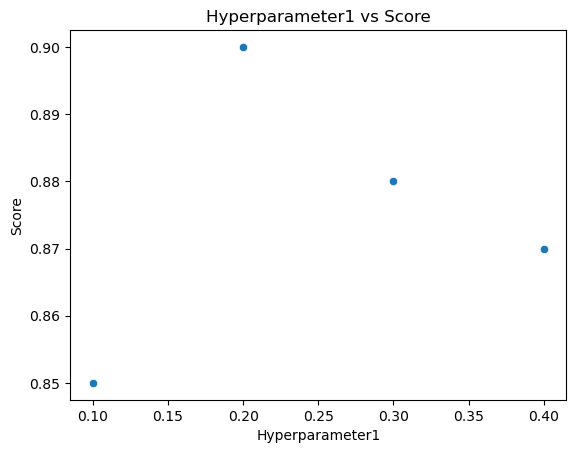

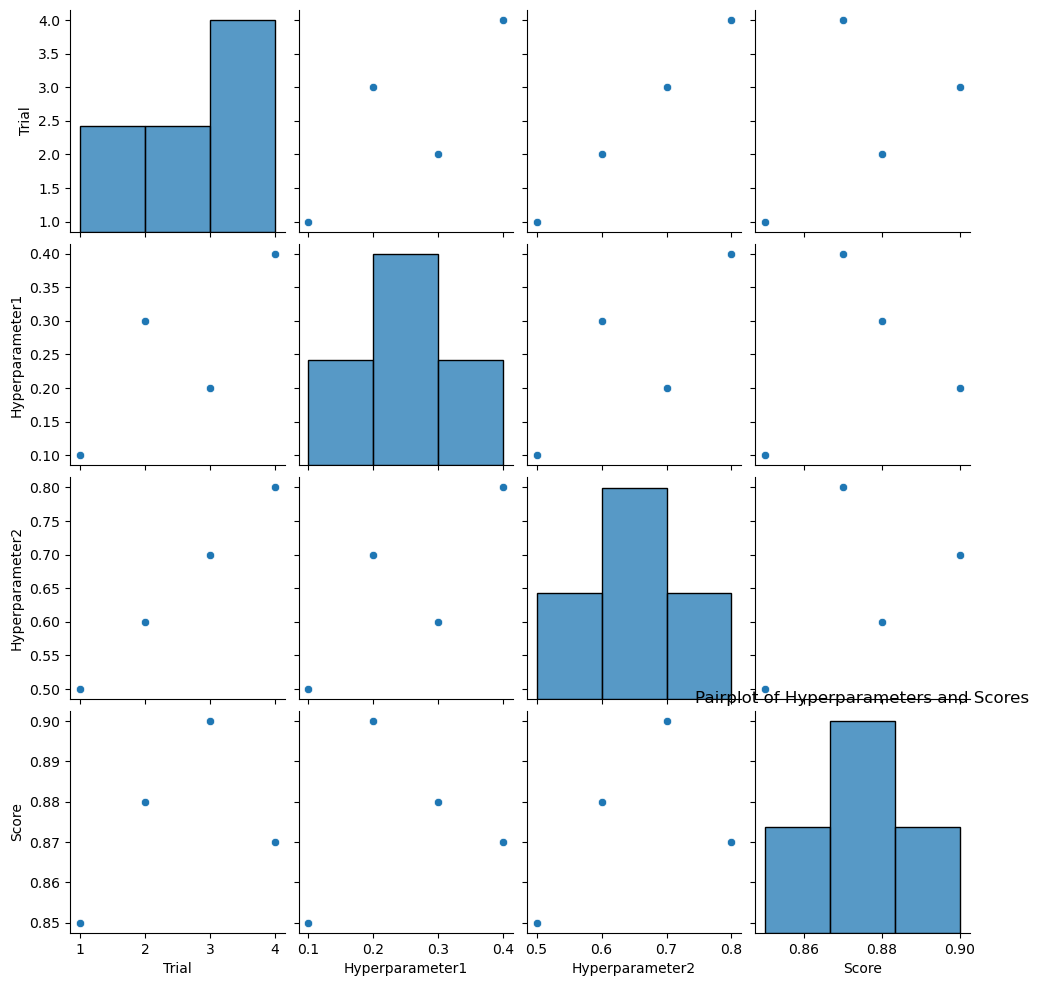

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import sagemaker
import pandas as pd

# Create a SageMaker session
sagemaker_session = sagemaker.Session()

# List all tuning jobs and select the most recent one
tuning_jobs = sagemaker_session.sagemaker_client.list_hyper_parameter_tuning_jobs()
latest_tuning_job = max(tuning_jobs['HyperParameterTuningJobSummaries'], key=lambda x: x['CreationTime'])

# Attach to the most recent tuning job
tuner = sagemaker.tuner.HyperparameterTuner.attach(latest_tuning_job['HyperParameterTuningJobName'])

# Describe the tuning job to retrieve trials
tuning_job_details = tuner.describe()

# Assuming you have trials data (replace 'trials' with actual data from the tuning job)
# For simplicity, we'll generate dummy trial data for visualization
# You should replace this with actual trial data from the tuning job (e.g., hyperparameters and score)

# Example data structure (use real data from the tuning job)
trials_df = pd.DataFrame({
    'Trial': [1, 2, 3, 4],
    'Hyperparameter1': [0.1, 0.3, 0.2, 0.4],
    'Hyperparameter2': [0.5, 0.6, 0.7, 0.8],
    'Score': [0.85, 0.88, 0.90, 0.87]
})

# Visualize the trials using Seaborn's heatmap (hyperparameters vs. score)
sns.heatmap(trials_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Hyperparameter Tuning Results")
plt.show()

# Visualize Hyperparameter1 vs Score using scatter plot
sns.scatterplot(x="Hyperparameter1", y="Score", data=trials_df)
plt.title("Hyperparameter1 vs Score")
plt.show()

# Optional: Visualize the relationship between hyperparameters and score using a pairplot
sns.pairplot(trials_df)
plt.title("Pairplot of Hyperparameters and Scores")
plt.show()


## Cleanup

To avoid incurring unwanted costs when you’re done experimenting with HPO, you must remove all files in your S3 bucket with the prefix `amt-visualize-demo`

Uncomment and run the following code to remove all S3 files created by this notebook. Note that`{BUCKET}` is the variable with our bucket name that we defined earlier, you may also write your bucket name as plaintext here.

If you wish to keep the datasets or the model artifacts, you may modify the prefix in the code to `amt-visualize-demo/data` to only delete the data or `amt-visualize-demo/output` to only delete the model artifacts.

In [34]:
# The following command deletes all objects in the specified S3 directory
# This uses the AWS CLI to remove files from the S3 bucket

# !aws: The exclamation mark allows us to run shell commands directly from within a Jupyter notebook
# aws s3 rm: 's3' specifies the S3 service, and 'rm' is the remove command used to delete objects
# s3://{BUCKET}/amt-visualize-demo: This is the S3 URI where the objects are located
# Replace {BUCKET} with the name of your actual S3 bucket
# amt-visualize-demo: This is the folder (or prefix) inside the bucket where objects are stored

# --recursive: This flag tells the AWS CLI to delete all objects within the specified directory and its subdirectories
# Without --recursive, only a single object would be deleted, but this flag ensures everything in the folder is removed

!aws s3 rm s3://{BUCKET}/amt-visualize-demo --recursive


delete: s3://k22-atul/amt-visualize-demo/output/bayesian-260120-0811-001-77a0d536/output/model.tar.gz
delete: s3://k22-atul/amt-visualize-demo/output/bayesian-260120-0811-003-f3e710e5/output/model.tar.gz
delete: s3://k22-atul/amt-visualize-demo/data/valid/valid.csv
delete: s3://k22-atul/amt-visualize-demo/output/bayesian-260120-0811-002-83e420ba/output/model.tar.gz
delete: s3://k22-atul/amt-visualize-demo/output/sagemaker-xgboost-2026-01-20-08-08-04-236/debug-output/index/000000000/000000000010_worker_0.json
delete: s3://k22-atul/amt-visualize-demo/output/sagemaker-xgboost-2026-01-20-08-08-04-236/debug-output/training_job_end.ts
delete: s3://k22-atul/amt-visualize-demo/output/sagemaker-xgboost-2026-01-20-08-08-04-236/output/model.tar.gz
delete: s3://k22-atul/amt-visualize-demo/output/sagemaker-xgboost-2026-01-20-08-08-04-236/profiler-output/framework/training_job_end.ts
delete: s3://k22-atul/amt-visualize-demo/output/sagemaker-xgboost-2026-01-20-08-08-04-236/debug-output/events/0000000

## How to Stop and Delete a SageMaker Notebook Instance

1. **Stop the Notebook Instance**:
   - Go to the **Notebook instances** section of the SageMaker Console.
   - Find the notebook instance you want to stop (e.g., `k21`).
   - Click the **Actions** button (three vertical dots) next to the notebook instance name.
   - Select **Stop** from the dropdown.

2. **Delete the Notebook Instance**:
   - Once the notebook is stopped, go to **Actions** → **Delete**.
   - Confirm the deletion.
   - Remember to **back up any important work** before deleting the notebook instance.


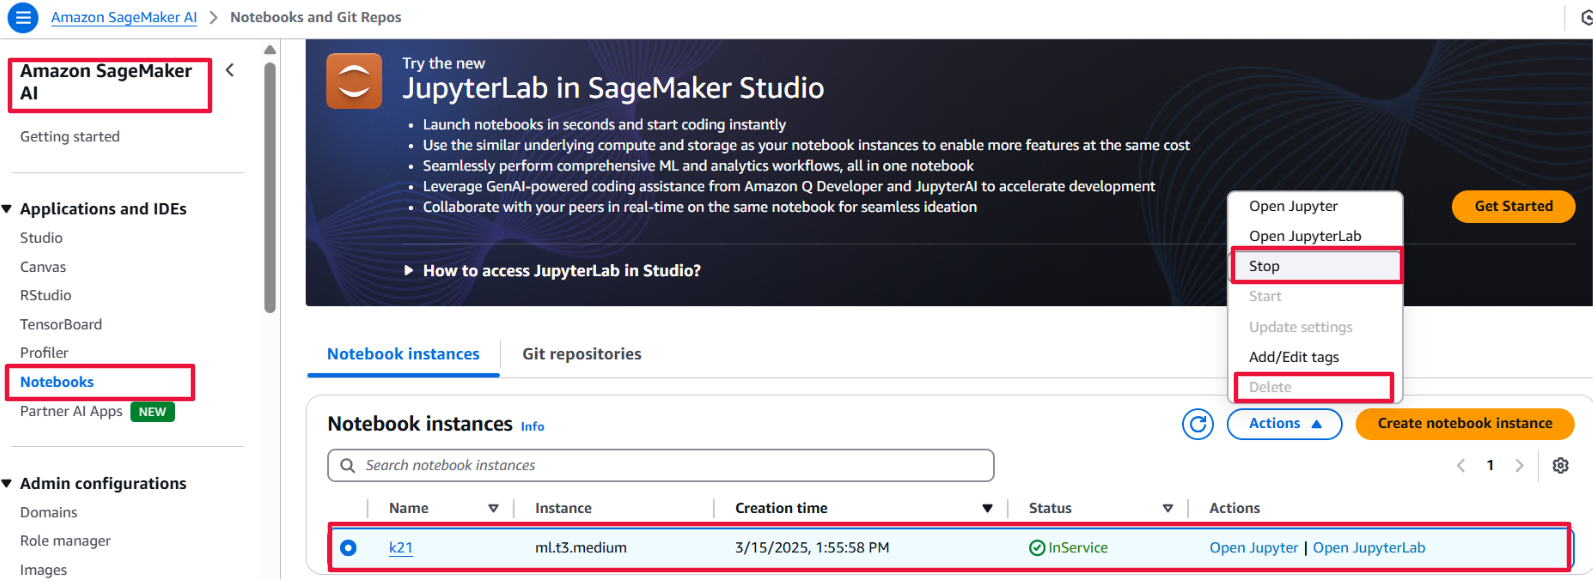